In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import AlgoLoop
import StatisticFunc

plt.style.use('Solarize_Light2')                     # 绘图风格
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 字体雅黑
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False    # 处理负号

# 预处理（不含外国资产，指数权重）

## 提取并处理数据

### 各种利率

In [2]:
# GC007 利率
GCRates = pd.read_excel(io="Raw/GC007利率.xlsx")           #  读取数据
GCRates = GCRates.drop([0, 1, 2], axis=0)                   # 删除多余行
GCRates.columns = ['日期', 'GC007']                        # 修改列名
GCRates["日期"] = pd.DatetimeIndex(GCRates["日期"])           # 类型转换
GCRates = GCRates.set_index("日期")                          # 设置索引

In [3]:
# 10年国债收益率
CNRates = pd.read_excel(io="Raw/中债国债到期收益率(中债)(日).xls")        # 读取数据
CNRates.columns = ['日期', '十年国债收益率']                             # 修改列名
CNRates = CNRates.drop([0, 3870, 3871], axis=0)                       # 删除多余行
CNRates["日期"] = pd.DatetimeIndex(CNRates["日期"])                    # 类型转换
CNRates = CNRates.set_index("日期")                                   # 设置索引

In [4]:
# 10年美债收益率
USRates = pd.read_excel(io="Raw/美债收益率.xlsx")                       # 读取数据
USRates.columns = ['日期', '十年美债收益率']                             # 修改列名
USRates = USRates.drop([0, 6263, 6264], axis=0)                       # 删除多余行
USRates["日期"] = pd.DatetimeIndex(USRates["日期"])                    # 类型转换
USRates = USRates.set_index("日期")                                    # 设置索引

In [5]:
# 合并利率
Rates = GCRates.merge(CNRates, how='left', left_index=True, right_index=True)
Rates = Rates.merge(USRates, how='left', left_index=True, right_index=True)

In [6]:
Rates

,GC007,十年国债收益率,十年美债收益率
日期,,,
2008-01-02,3,4.4363,3.91
2008-01-03,2.815,4.4263,3.91
2008-01-04,2.85,4.4013,3.88
2008-01-07,2.7,4.3948,3.86
2008-01-08,2,4.4024,3.86
...,...,...,...
2020-06-19,2.87,2.8752,0.7
2020-06-22,3.135,2.9153,0.71
2020-06-23,3.015,2.9127,0.72


### 权益类资产换手率

In [7]:
Turnovers = pd.read_excel(io="Raw/资产换手率.xlsx")                      # 读取数据
Turnovers = Turnovers.drop([0], axis=0)                                   # 删除多余行
Turnovers["日期"] = pd.DatetimeIndex(Turnovers["日期"])                    # 类型转换
Turnovers = Turnovers.set_index("日期")                                   # 设置索引

In [8]:
# 时间对齐
Turnovers = Turnovers.loc[Rates.index, :]

### 美元汇率

In [9]:
FXRates = pd.read_excel(io="Raw/美元汇率.xlsx")
FXRates = FXRates.drop([0, 1, 2], axis=0)
FXRates.columns = ['日期', '美元汇率']                        
FXRates["日期"] = pd.DatetimeIndex(FXRates["日期"])
FXRates = FXRates.set_index("日期")

In [10]:
FXRates

,美元汇率
日期,
2008-01-02,0
2008-01-03,7.2725
2008-01-04,7.2725
2008-01-07,7.269
2008-01-08,7.2643
...,...
2020-07-03,7.068
2020-07-06,7.033
2020-07-07,7.0241


### 各资产收盘价

In [11]:
Assets = pd.read_excel(io="Raw/资产收盘价.xlsx")
Assets = Assets.drop([0], axis=0)                                   # 删除多余行
Assets["日期"] = pd.DatetimeIndex(Assets["日期"])                    # 类型转换
Assets = Assets.set_index("日期")                                   # 设置索引

In [12]:
# 时间对齐
Assets = Assets.loc[Rates.index, :]

### 十年国债价格指数

In [13]:
HoldPeriod = (Assets.index - Assets.index[0]).days

# 计算十年国债
Assets['10年国债'] = 100 - (Rates['十年国债收益率'] - 3.0) * 8.2 + 3.0 * HoldPeriod / 365.0
Assets['10年国债'] = Assets['10年国债'].fillna(method='ffill')

#计算十年美债
Assets['10年美债'] = 100 - (Rates['十年美债收益率'] - 3.0) * 8.2 + 3.0 * HoldPeriod / 365.0
Assets['10年美债'] = Assets['10年美债'].fillna(method='ffill')

In [14]:
# 替换上证十年国债指数
Assets = Assets.drop('上证10年国债', axis=1)
Assets

,沪深300,中证500,信用债3-5AAA,中信证券COMEX铜期货,中信证券COMEX黄金期货,中信证券WTI原油期货,中信证券铁矿石,标普500,10年国债,10年美债
日期,,,,,,,,,,
2008-01-02,5385.1,5123.93,99.689,7657.43,9302.4,10694.4,NaN,1447.16,88.222340,92.538000
2008-01-03,5422.03,5230.75,99.529,7943.2,9372.37,10614.9,NaN,1447.16,88.312559,92.546219
2008-01-04,5483.65,5243.03,99.568,7867.64,9336.21,10479.6,NaN,1411.63,88.525778,92.800438
2008-01-07,5556.59,5347.81,99.585,7817.5,9285.58,10166,NaN,1416.18,88.603736,92.989096
2008-01-08,5528.05,5200.55,99.448,8220.33,9495.24,10312.2,NaN,1390.19,88.549635,92.997315
...,...,...,...,...,...,...,...,...,...,...
2020-06-19,4098.71,5787.15,200.598,5072.06,15459.5,746.671,2536.27,3097.74,138.437059,156.273699
2020-06-22,4102.05,5784.03,200.394,5135.16,15567.2,763.025,2500.06,3117.86,138.132896,156.216356
2020-06-23,4121.79,5804.34,200.015,5132.65,15661.6,754.211,2486.89,3131.29,138.162435,156.142575


## 计算各资产收益率

### 日内损益

In [15]:
Returns = Assets.pct_change(axis=0)
Returns = Returns.dropna(axis=0, how='all')           # 删除无数据日

In [16]:
# 去除国外资产
Returns = Returns.drop('标普500', axis=1)
Returns = Returns.drop('10年美债', axis=1)

### 累计损益

In [17]:
cumReturns = (1.0 + Returns)
cumReturns = cumReturns.fillna(1.0)                    # 填充空值
cumReturns = cumReturns.cumprod()                      # 计算各资产累计收益率

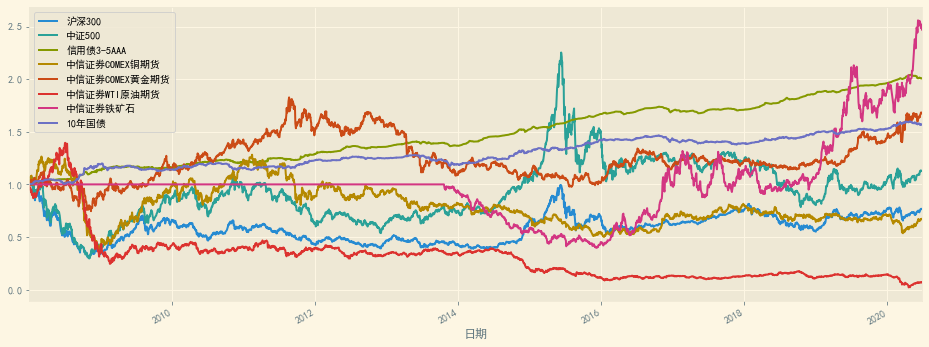

In [18]:
cumReturns.plot(figsize=(16, 6))

### 杠杆调整后的债券净值

In [19]:
lever = 2.0                                 # 杠杆
leverReturns = Returns.copy()               # 创建副本 
leverCumReturns = cumReturns.copy()   

In [20]:
# 更新杠杆调整后的债券净值
leverReturns['10年国债'] = Returns['10年国债'] * (1.0 + lever) - Rates.loc[Returns.index, 'GC007'] * lever / (365.0 * 100)
leverReturns['信用债3-5AAA'] = Returns['信用债3-5AAA'] * (1.0 + lever) - Rates.loc[Returns.index, 'GC007'] * lever / (365.0 * 100)

# 更新累计净值
leverCumReturns = (1.0 + leverReturns)
leverCumReturns = leverCumReturns.fillna(1.0)                    # 填充空值
leverCumReturns = leverCumReturns.cumprod()                      # 计算各资产累计收益率

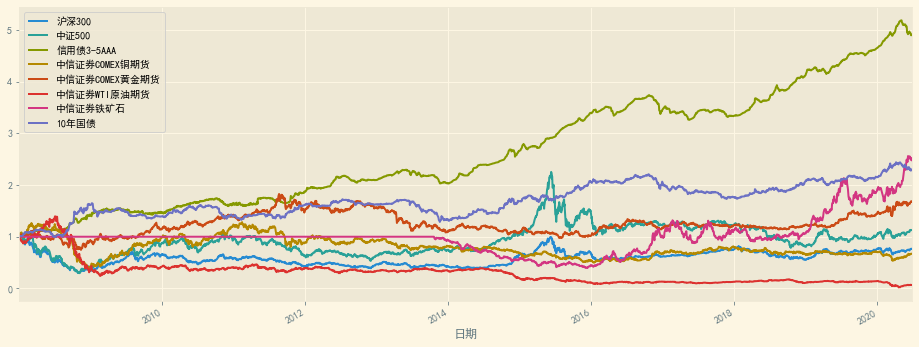

In [21]:
leverCumReturns.plot(figsize=(16, 6))

# 风险平价 （指数权重EMA）

**资产明细**
- 沪深300指数
- 中证500指数
- 三年期3A信用债全价指数
- 十年期国债全价指数(自制)
- COMEX铜
- COMEX黄金
- NYMEX原油
- 铁矿石期货

回溯时间：2008年初-至今

买卖单笔手续费：千1

## 程序运行

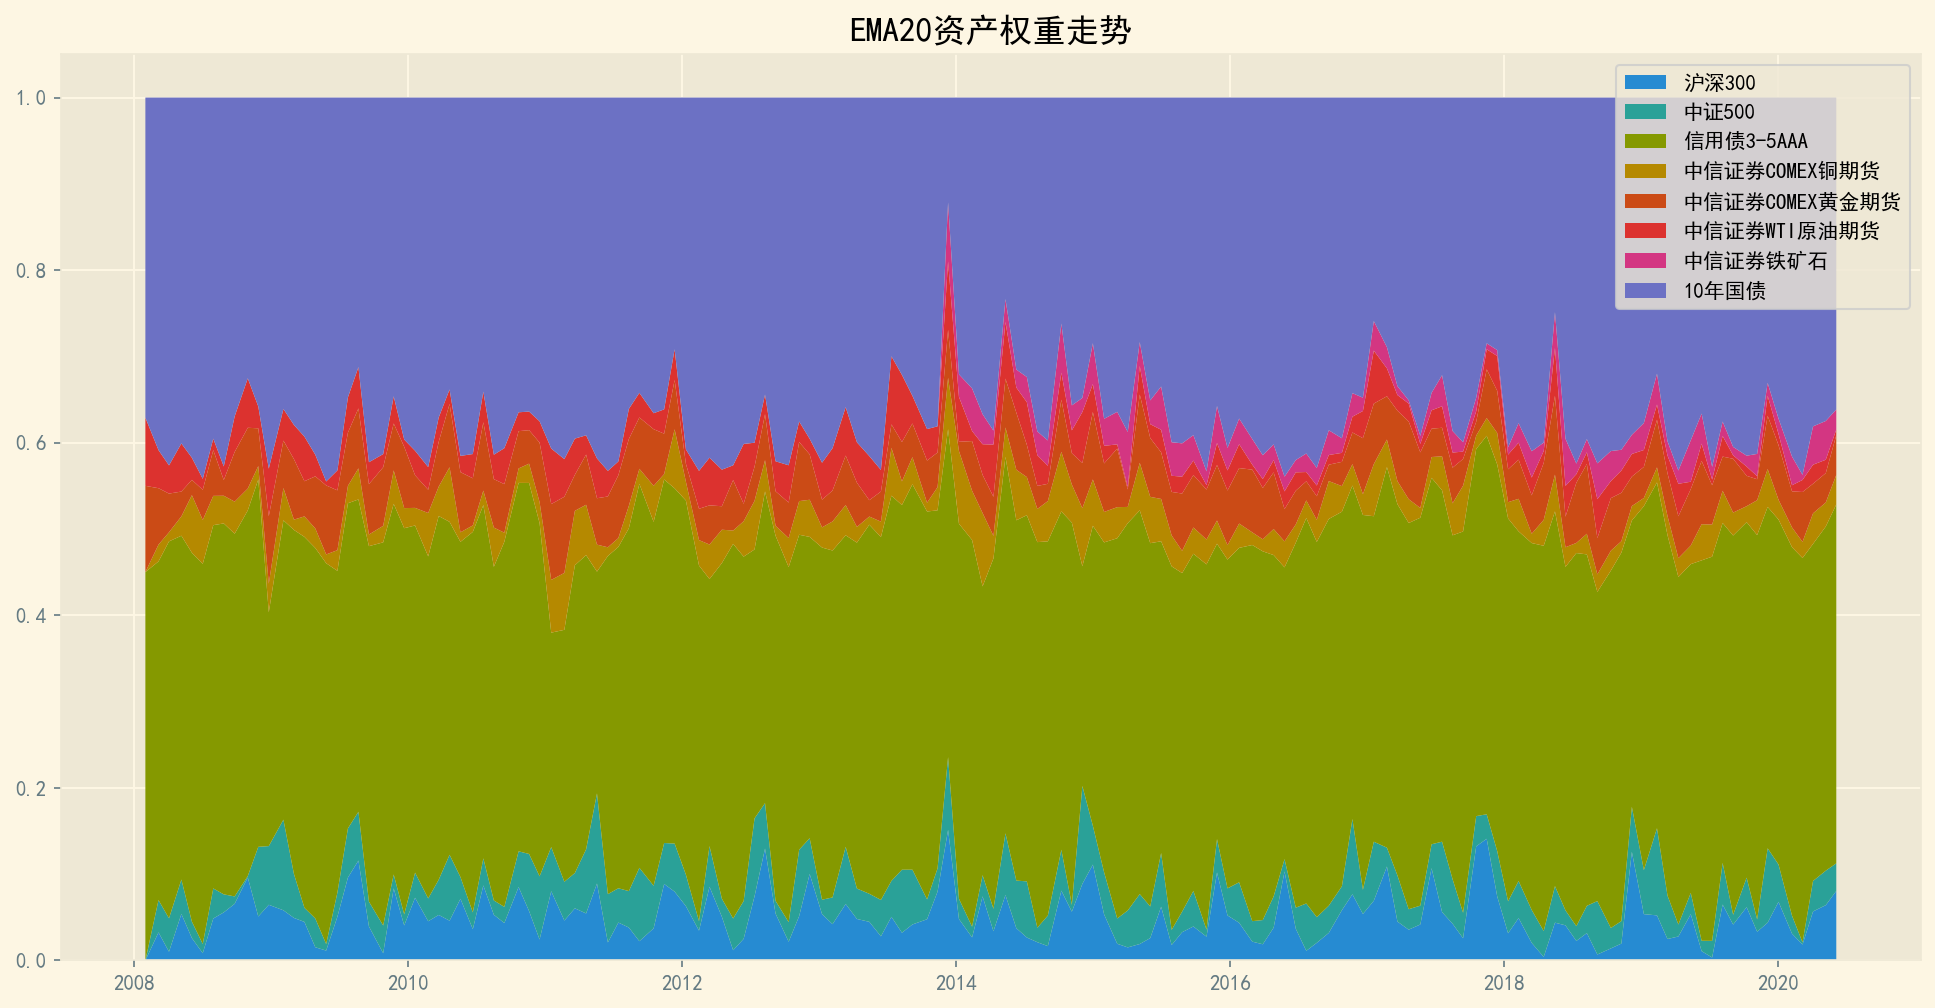

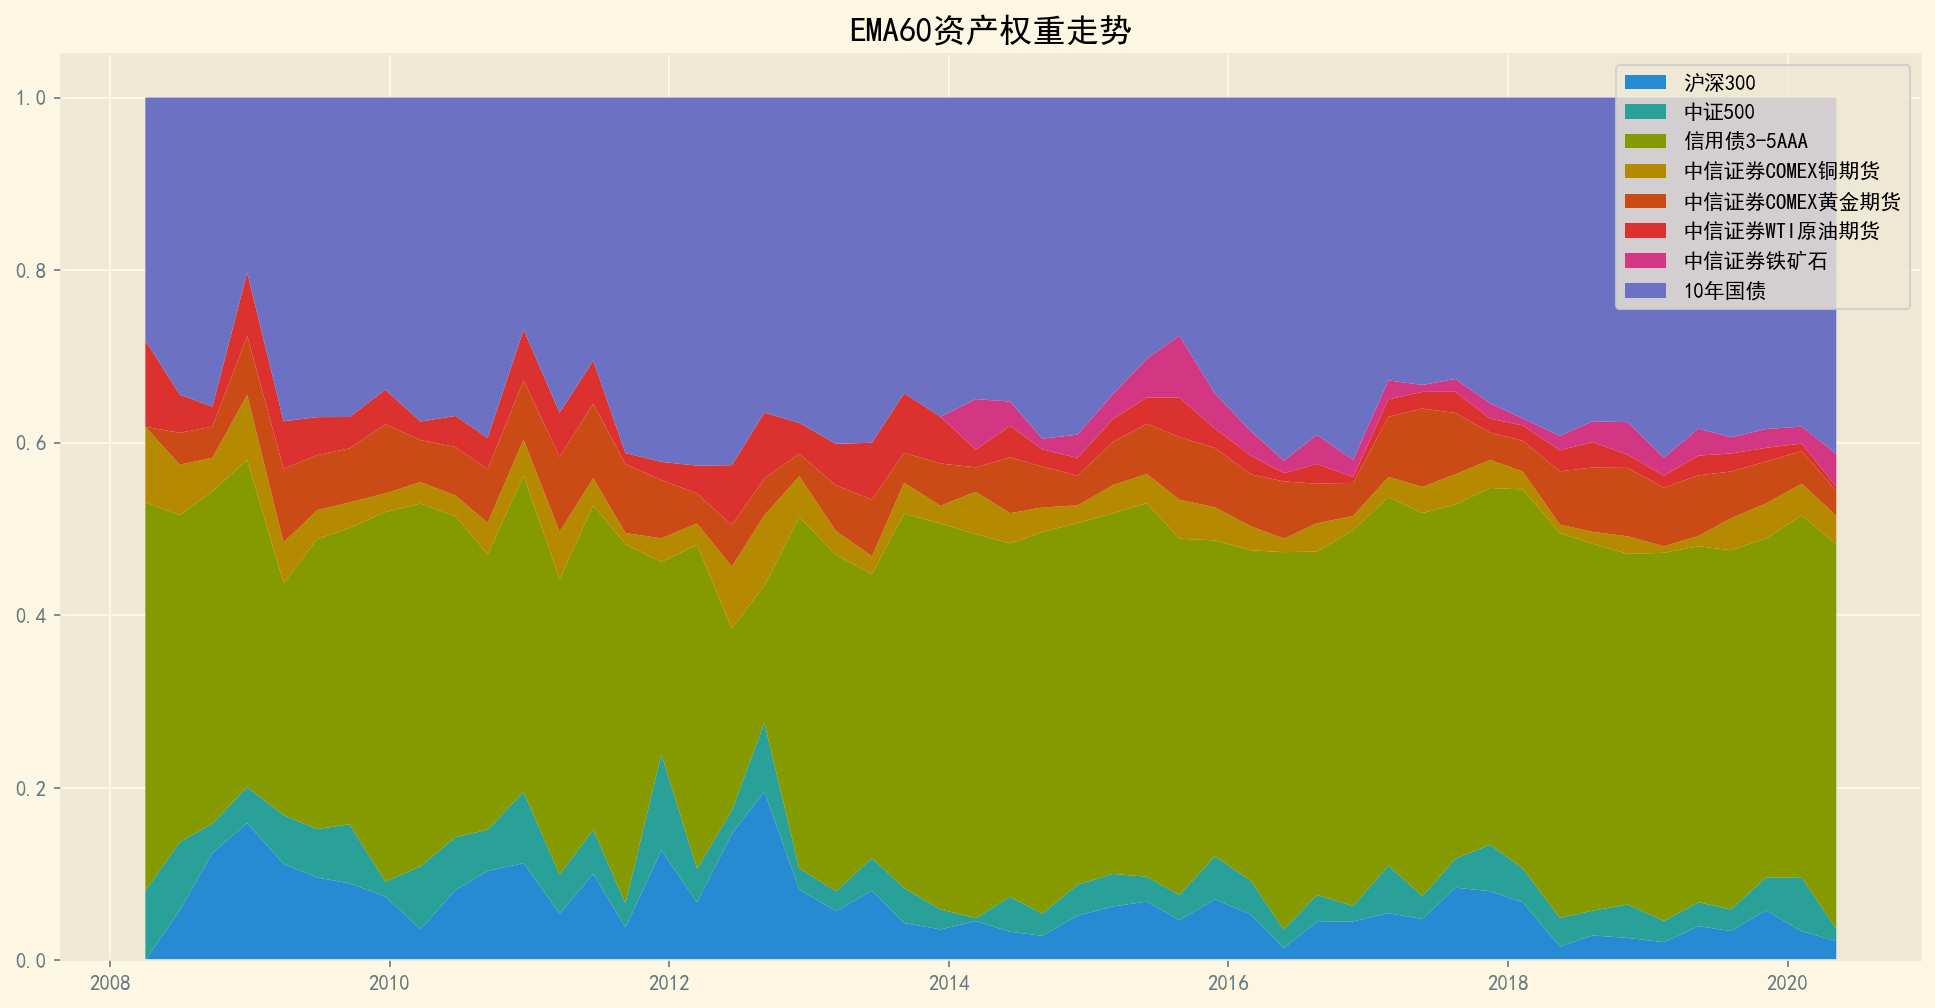

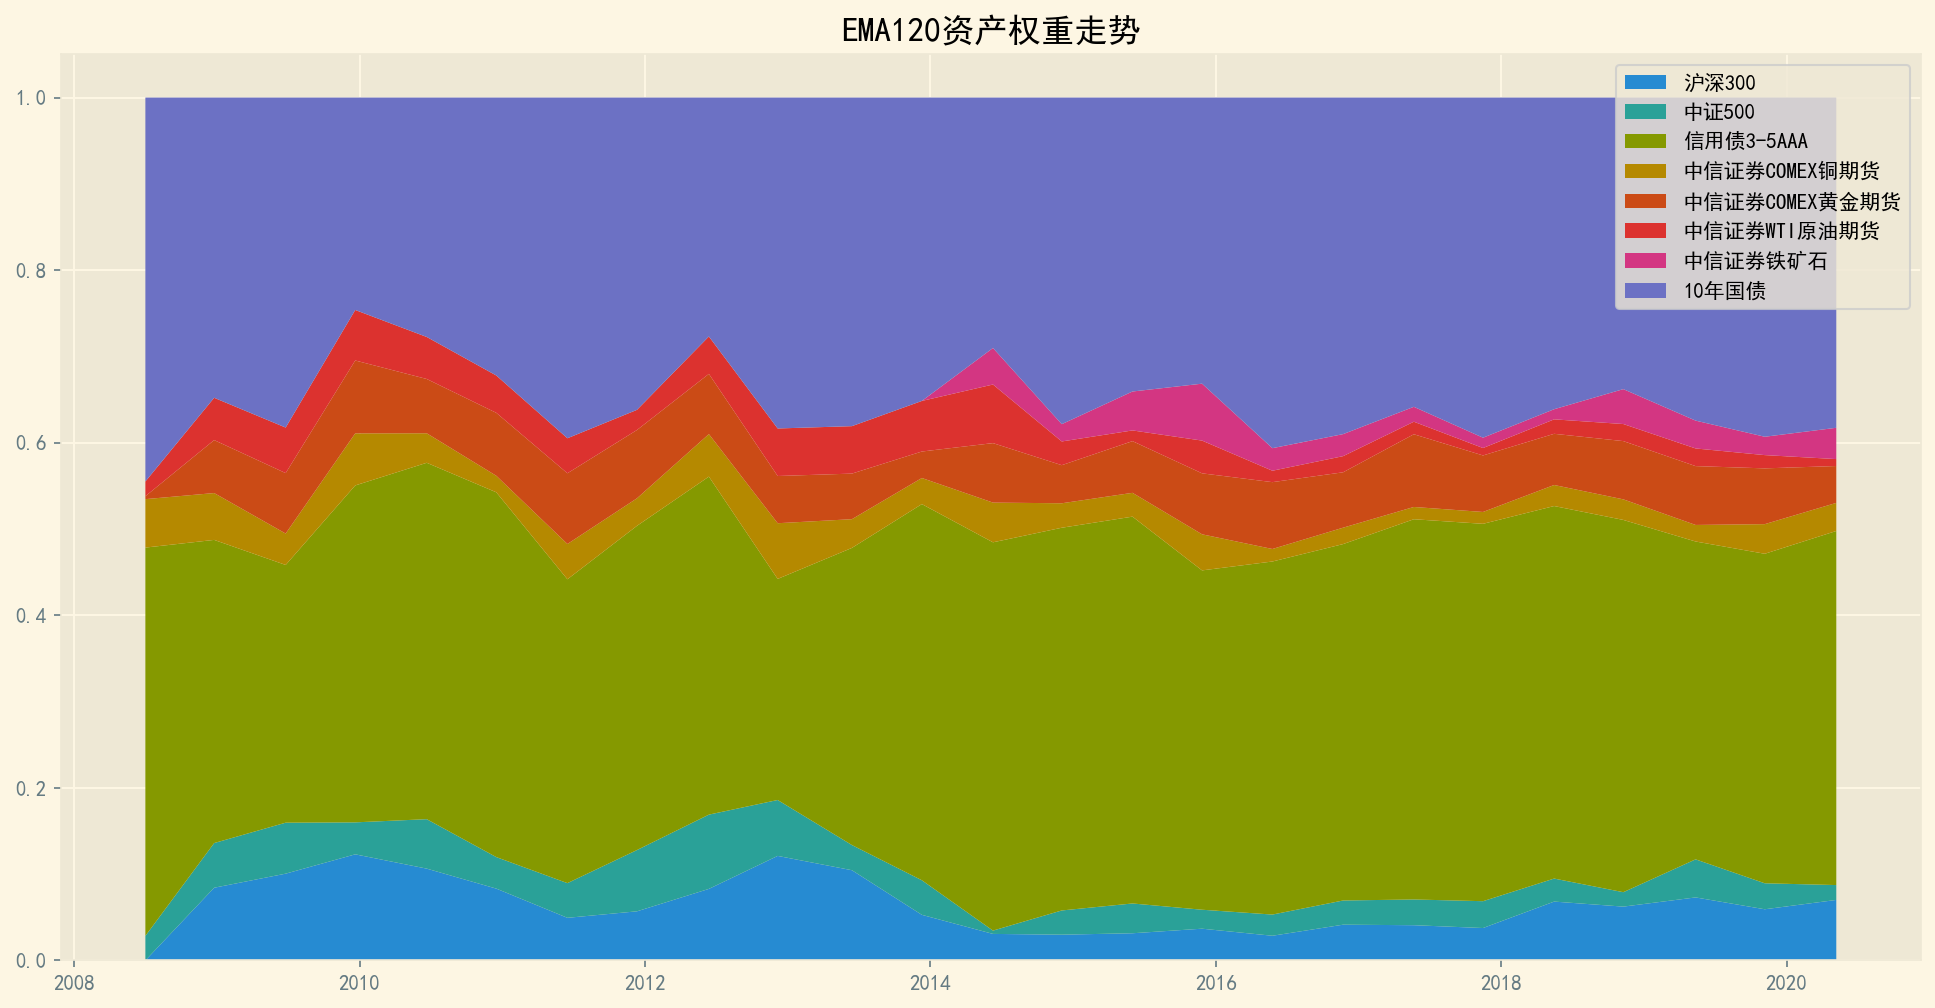

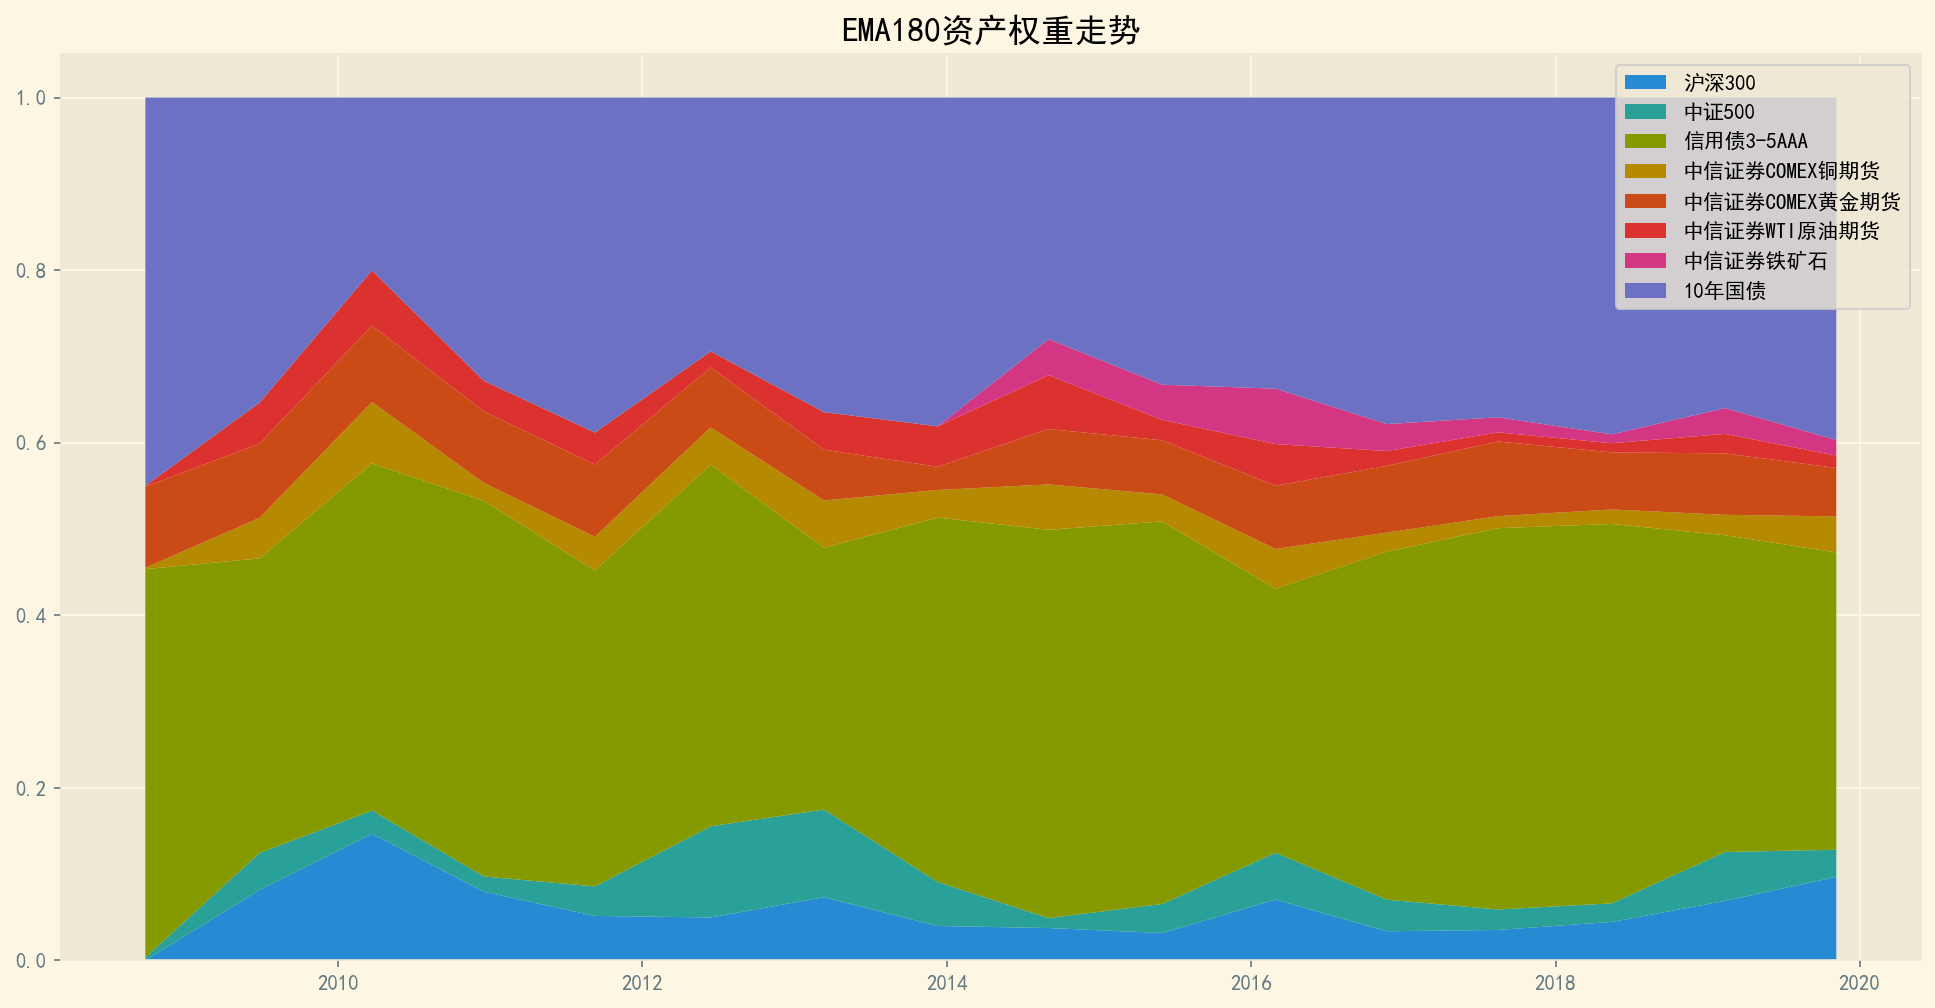

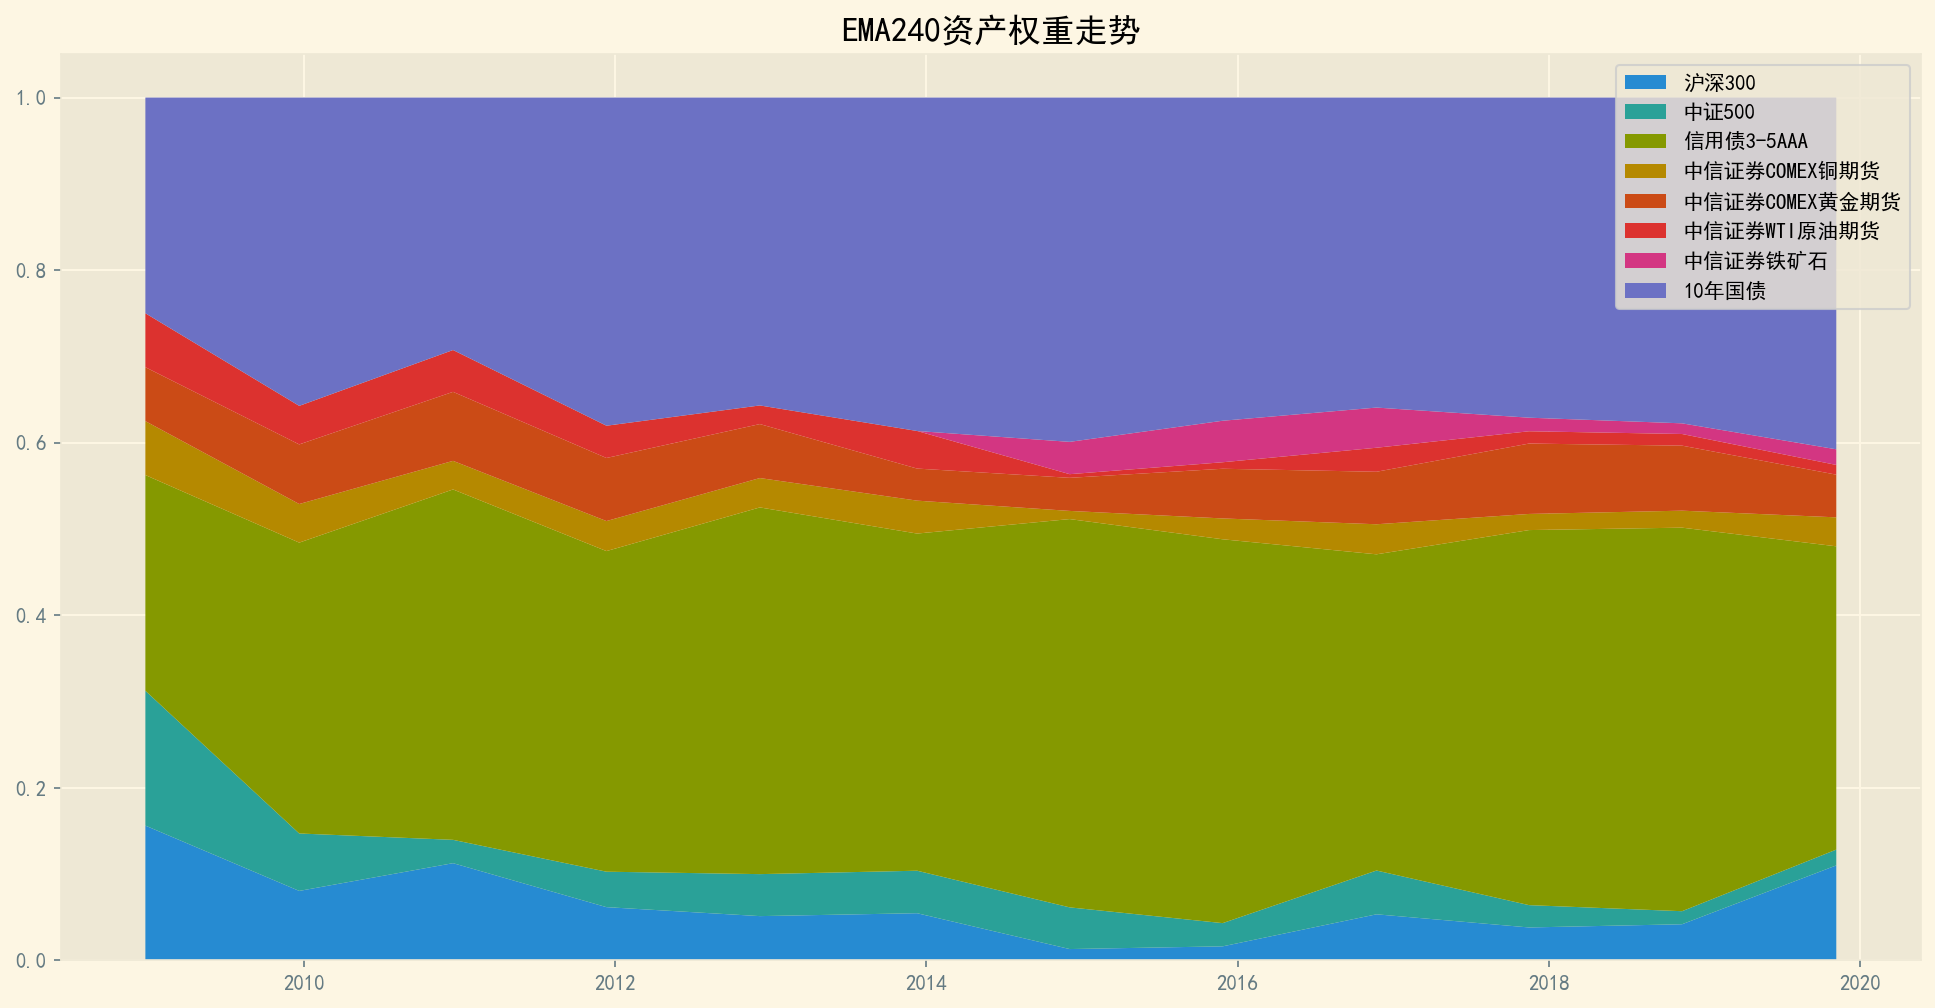

In [22]:
# 运行
timeWindow = [20, 60, 120, 180, 240]           # 调仓周期

NetValueDF_ema = pd.DataFrame(index=Returns.index)
DailyPnlDF_ema = pd.DataFrame(index=Returns.index) 
DrawDownDF_ema = pd.DataFrame(index=Returns.index)

for dtime in timeWindow:
    tradeDF, weightDF = AlgoLoop.AlgoTrade(Assets, Returns, cumReturns, Turnovers, mode='ema', dt=dtime)
    StatisticFunc.WeightPlot(tradeDF, weightDF, 'EMA'+str(dtime))
    
    NetValueDF_ema[str(dtime)+'组合净值'] = tradeDF['投资组合净值'] / 10000  
    DailyPnlDF_ema[str(dtime)+'组合日收益率'] = tradeDF['投资组合净值'] / tradeDF['投资组合净值'].shift(1) - 1.0
    DrawDownDF_ema[str(dtime)+'最大回撤'] = tradeDF['最大回撤']                      

## 回测表现汇总

In [23]:
# 汇总
summaryDF_ema = pd.DataFrame(index=['每月调仓', '每季度调仓', '每半年调仓', 
                                    '每三季度调仓', '每年调仓'])

summaryDF_ema["年平均收益率"] = DailyPnlDF_ema.mean(axis=0).values * 250
summaryDF_ema["年平均标准差"] = DailyPnlDF_ema.std(axis=0).values * np.sqrt(250)
summaryDF_ema["无基准夏普比率"] = summaryDF_ema["年平均收益率"] / summaryDF_ema["年平均标准差"]
summaryDF_ema["最大回撤"] = DrawDownDF_ema.min(axis=0).values
summaryDF_ema

,年平均收益率,年平均标准差,无基准夏普比率,最大回撤
每月调仓,0.029706,0.039854,0.745370,-0.073098
每季度调仓,0.052636,0.049403,1.065448,-0.093136
每半年调仓,0.053808,0.045712,1.177099,-0.077786
每三季度调仓,0.049314,0.042997,1.146914,-0.063693
每年调仓,0.075037,0.059018,1.271419,-0.104662


## 各投资组合净值曲线

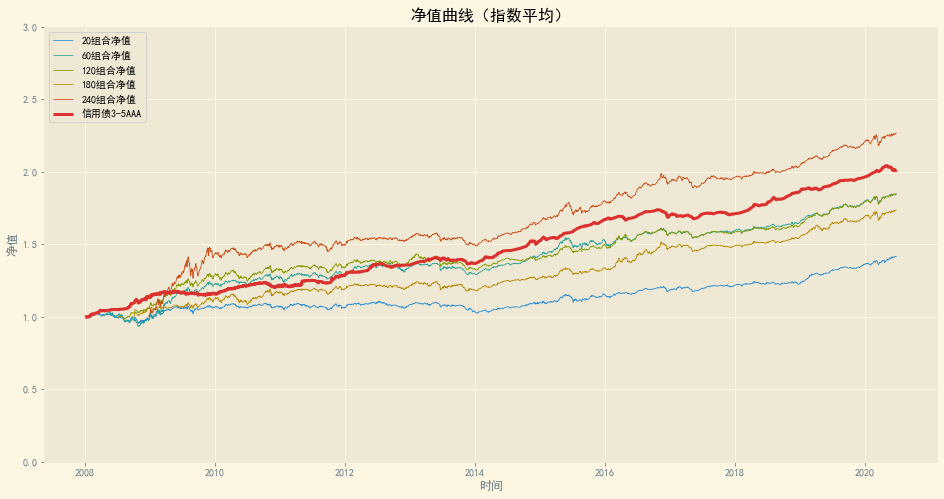

In [24]:
fig = plt.figure(figsize=(16, 8))

for col in NetValueDF_ema.columns:
    plt.plot(NetValueDF_ema.index, NetValueDF_ema[col], lw=0.8, label=col)
    
plt.plot(cumReturns.index, cumReturns['信用债3-5AAA'], lw=3.0, label='信用债3-5AAA')

plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 3.0)
plt.legend(loc='upper left')
plt.title('净值曲线（指数平均）')
plt.show()

# 风险平价 + 杠杆策略（指数权重EMA）

## 程序运行

In [ ]:
# 运行
timeWindow = [20, 60, 120, 180, 240]           # 调仓周期

leverNetValueDF_ema = pd.DataFrame(index=Returns.index)
leverDailyPnlDF_ema = pd.DataFrame(index=Returns.index) 
leverDrawDownDF_ema = pd.DataFrame(index=Returns.index)

for dtime in timeWindow:
    tradeDF, weightDF = AlgoLoop.AlgoTrade(Assets, leverReturns, leverCumReturns, Turnovers, mode='ema', dt=dtime)
    StatisticFunc.WeightPlot(tradeDF, weightDF, '杠杆EMA'+str(dtime))
    
    leverNetValueDF_ema[str(dtime)+'组合净值'] = tradeDF['投资组合净值'] / 10000  
    leverDailyPnlDF_ema[str(dtime)+'组合日收益率'] = tradeDF['投资组合净值'] / tradeDF['投资组合净值'].shift(1) - 1.0
    leverDrawDownDF_ema[str(dtime)+'最大回撤'] = tradeDF['最大回撤']                      

## 回测表现汇总

In [ ]:
# 汇总
leverSummaryDF_ema = pd.DataFrame(index=['每月调仓', '每季度调仓', '每半年调仓', 
                                    '每三季度调仓', '每年调仓'])

leverSummaryDF_ema["年平均收益率"] = leverDailyPnlDF_ema.mean(axis=0).values * 250
leverSummaryDF_ema["年平均标准差"] = leverDailyPnlDF_ema.std(axis=0).values * np.sqrt(250)
leverSummaryDF_ema["无基准夏普比率"] = leverSummaryDF_ema["年平均收益率"] / leverSummaryDF_ema["年平均标准差"]
leverSummaryDF_ema["最大回撤"] = leverDrawDownDF_ema.min(axis=0).values
leverSummaryDF_ema

## 各投资组合净值曲线

In [ ]:
fig = plt.figure(figsize=(16, 8))

for col in leverNetValueDF_ema.columns:
    plt.plot(leverNetValueDF_ema.index, leverNetValueDF_ema[col], lw=0.8, label=col)
    
# plt.plot(cumReturns.index, cumReturns['中证500'], lw=1.5, label='中证500')
plt.plot(cumReturns.index, cumReturns['信用债3-5AAA'], lw=3.0, label='信用债3-5AAA')

plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('净值曲线（杠杆，指数平均）')
plt.show()

## 年间收益率分布

In [ ]:
yearReturns_ema = StatisticFunc.annualReturns(NetValueDF_ema)

In [ ]:
StatisticFunc.ReturnDist(yearReturns_ema, 2)

## 月间收益率分布

In [ ]:
monthlyReturns_ema = StatisticFunc.monthlyReturns(NetValueDF_ema)

In [ ]:
StatisticFunc.ReturnDist(monthlyReturns_ema, 2)

# 风险平价 + 杠杆 + 因子策略（指数权重EMA）

## 动量因子（横向比较）

### 程序运行

In [ ]:
# 运行
timeWindow = [20, 60, 120, 180, 240]        # 调仓周期
ups = [0.50, 1.00]        # 上调幅度

multiIDX = pd.MultiIndex.from_product([timeWindow, ups], names=['交易周期', '上调幅度'])
leverNetValueDF_momentumX = pd.DataFrame(index=Returns.index, columns=multiIDX)
leverDailyPnlDF_momentumX = pd.DataFrame(index=Returns.index, columns=multiIDX) 
leverDrawDownDF_momentumX = pd.DataFrame(index=Returns.index, columns=multiIDX)

In [ ]:
thrds = {'Equity':0.50, 'FixedIncome':0.90, 'Commodity':0.30}
factors = {'momentumX':True, 'momentumT':False, 
           'reverseX':False, 'reverseT':False, 
           'turnover':False,  
           'copperGold':False, 'copperGas':False}

for t in timeWindow:
    for u in ups:
        tradeDF, weightDF = AlgoLoop.AlgoTrade(Assets, leverReturns, leverCumReturns, Turnovers, 
                                               mode='ema', dt=t, up=u, thresholds=thrds,
                                               factorDict=factors)
        StatisticFunc.WeightPlot(tradeDF, weightDF, '杠杆横截面动量（指数权重EMA）'+str(t+u))

        leverNetValueDF_momentumX.loc[:, (t, u)] = tradeDF['投资组合净值'] / 10000
        leverDailyPnlDF_momentumX.loc[:, (t, u)] = tradeDF['投资组合净值'] / tradeDF['投资组合净值'].shift(1) - 1.0
        leverDrawDownDF_momentumX.loc[:, (t, u)] = tradeDF['最大回撤']                      

### 回测表现汇总

In [ ]:
# 汇总
leverSummaryDF_momentumX = pd.DataFrame(index=multiIDX)

leverSummaryDF_momentumX["年平均收益率"] = leverDailyPnlDF_momentumX.mean(axis=0).values * 250
leverSummaryDF_momentumX["年平均标准差"] = leverDailyPnlDF_momentumX.std(axis=0).values * np.sqrt(250)
leverSummaryDF_momentumX["无基准夏普比率"] = leverSummaryDF_momentumX["年平均收益率"] / leverSummaryDF_momentumX["年平均标准差"]
leverSummaryDF_momentumX["最大回撤"] = leverDrawDownDF_momentumX.min(axis=0).values

leverSummaryDF_momentumX

### 各投资组合净值曲线

In [ ]:
fig = plt.figure(figsize=(16, 8), dpi=200)

for col in leverNetValueDF_momentumX.columns:
    plt.plot(leverNetValueDF_momentumX.index, leverNetValueDF_momentumX[col], label=col)
    
plt.plot(cumReturns.index, cumReturns['信用债3-5AAA'], lw=3.5, label='信用债3-5AAA')

plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('杠杆横截面动量因子（指数权重EMA）')
plt.show()

## 动量因子（时序比较）

### 程序运行

In [ ]:
# 运行
timeWindow = [20, 60, 120, 180, 240]        # 调仓周期
ups = [0.50, 1.00]                          # 上调幅度

multiIDX = pd.MultiIndex.from_product([timeWindow, ups], names=['交易周期', '上调幅度'])
leverNetValueDF_momentumT = pd.DataFrame(index=Returns.index, columns=multiIDX)
leverDailyPnlDF_momentumT = pd.DataFrame(index=Returns.index, columns=multiIDX) 
leverDrawDownDF_momentumT = pd.DataFrame(index=Returns.index, columns=multiIDX)

In [ ]:
thrds = {'Equity':0.50, 'FixedIncome':0.90, 'Commodity':0.30}
factors = {'momentumX':False, 'momentumT':True, 
           'reverseX':False, 'reverseT':False, 
           'turnover':False, 
           'copperGold':False, 'copperGas':False}

for t in timeWindow:
    for u in ups:
        tradeDF, weightDF = AlgoLoop.AlgoTrade(Assets, leverReturns, leverCumReturns, Turnovers, 
                                               mode='ema', dt=t, up=u, thresholds=thrds, 
                                               factorDict=factors)
        StatisticFunc.WeightPlot(tradeDF, weightDF, '杠杆时序动量（指数权重EMA）'+str(t+u))

        leverNetValueDF_momentumT.loc[:, (t, u)] = tradeDF['投资组合净值'] / 10000  
        leverDailyPnlDF_momentumT.loc[:, (t, u)] = tradeDF['投资组合净值'] / tradeDF['投资组合净值'].shift(1) - 1.0
        leverDrawDownDF_momentumT.loc[:, (t, u)] = tradeDF['最大回撤']                      

### 回测表现汇总

In [ ]:
# 汇总
leverSummaryDF_momentumT = pd.DataFrame(index=multiIDX)

leverSummaryDF_momentumT["年平均收益率"] = leverDailyPnlDF_momentumT.mean(axis=0).values * 250
leverSummaryDF_momentumT["年平均标准差"] = leverDailyPnlDF_momentumT.std(axis=0).values * np.sqrt(250)
leverSummaryDF_momentumT["无基准夏普比率"] = leverSummaryDF_momentumT["年平均收益率"] / leverSummaryDF_momentumT["年平均标准差"]
leverSummaryDF_momentumT["最大回撤"] = leverDrawDownDF_momentumT.min(axis=0).values

leverSummaryDF_momentumT

### 各投资组合净值曲线

In [ ]:
fig = plt.figure(figsize=(16, 8), dpi=200)

for col in leverNetValueDF_momentumT.columns:
    plt.plot(leverNetValueDF_momentumT.index, leverNetValueDF_momentumT[col], label=col)

plt.plot(cumReturns.index, cumReturns['信用债3-5AAA'], lw=3.0, label='信用债3-5AAA')
    
plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('杠杆时间序列动量因子（指数权重EMA）')
plt.show()

## 反转因子（横向比较）

### 程序运行

In [ ]:
# 运行
timeWindow = [20, 60, 120, 180, 240]        # 调仓周期
ups = [0.50, 1.00]                          # 上调幅度

multiIDX = pd.MultiIndex.from_product([timeWindow, ups], names=['交易周期', '上调幅度'])
leverNetValueDF_reverseX = pd.DataFrame(index=Returns.index, columns=multiIDX)
leverDailyPnlDF_reverseX = pd.DataFrame(index=Returns.index, columns=multiIDX) 
leverDrawDownDF_reverseX = pd.DataFrame(index=Returns.index, columns=multiIDX)

In [ ]:
thrds = {'Equity':0.50, 'FixedIncome':0.90, 'Commodity':0.30}
factors = {'momentumX':False, 'momentumT':False, 
           'reverseX':True, 'reverseT':False, 
           'turnover':False,
           'copperGold':False, 'copperGas':False}

for t in timeWindow:
    for u in ups:
        tradeDF, weightDF = AlgoLoop.AlgoTrade(Assets, leverReturns, leverCumReturns, Turnovers, 
                                               mode='ema', dt=t, up=u, thresholds=thrds, 
                                               factorDict=factors)
        StatisticFunc.WeightPlot(tradeDF, weightDF, '杠杆横截面反转（指数权重EMA）'+str(t+u))

        leverNetValueDF_reverseX.loc[:, (t, u)] = tradeDF['投资组合净值'] / 10000  
        leverDailyPnlDF_reverseX.loc[:, (t, u)] = tradeDF['投资组合净值'] / tradeDF['投资组合净值'].shift(1) - 1.0
        leverDrawDownDF_reverseX.loc[:, (t, u)] = tradeDF['最大回撤']                      

### 回测表现汇总

In [ ]:
# 汇总
leverSummaryDF_reverseX = pd.DataFrame(index=multiIDX)

leverSummaryDF_reverseX["年平均收益率"] = leverDailyPnlDF_reverseX.mean(axis=0).values * 250
leverSummaryDF_reverseX["年平均标准差"] = leverDailyPnlDF_reverseX.std(axis=0).values * np.sqrt(250)
leverSummaryDF_reverseX["无基准夏普比率"] = leverSummaryDF_reverseX["年平均收益率"] / leverSummaryDF_reverseX["年平均标准差"]
leverSummaryDF_reverseX["最大回撤"] = leverDrawDownDF_reverseX.min(axis=0).values

leverSummaryDF_reverseX

### 各投资组合净值曲线

In [ ]:
fig = plt.figure(figsize=(16, 8), dpi=200)

for col in leverNetValueDF_reverseX.columns:
    plt.plot(leverNetValueDF_reverseX.index, leverNetValueDF_reverseX[col], label=col)
    
plt.plot(cumReturns.index, cumReturns['信用债3-5AAA'], lw=3.0, label='信用债3-5AAA')

plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('杠杆横截面反转因子（指数权重EMA）')
plt.show()

## 反转因子 （时序比较）

### 程序运行

In [ ]:
# 运行
timeWindow = [20, 60, 120, 180, 240]        # 调仓周期
ups = [0.50, 1.00]                          # 上调幅度

multiIDX = pd.MultiIndex.from_product([timeWindow, ups], names=['交易周期', '上调幅度'])
leverNetValueDF_reverseT = pd.DataFrame(index=Returns.index, columns=multiIDX)
leverDailyPnlDF_reverseT = pd.DataFrame(index=Returns.index, columns=multiIDX) 
leverDrawDownDF_reverseT = pd.DataFrame(index=Returns.index, columns=multiIDX)

In [ ]:
thrds = {'Equity':0.50, 'FixedIncome':0.90, 'Commodity':0.30}
factors = {'momentumX':False, 'momentumT':False, 
           'reverseX':False, 'reverseT':True, 
           'turnover':False,
           'copperGold':False, 'copperGas':False}

for t in timeWindow:
    for u in ups:
        tradeDF, weightDF = AlgoLoop.AlgoTrade(Assets, leverReturns, leverCumReturns, Turnovers, 
                                               mode='ema', dt=t, up=u, thresholds=thrds, 
                                               factorDict=factors)
        StatisticFunc.WeightPlot(tradeDF, weightDF, '杠杆时序反转（指数权重EMA）'+str(t+u))

        leverNetValueDF_reverseT.loc[:, (t, u)] = tradeDF['投资组合净值'] / 10000  
        leverDailyPnlDF_reverseT.loc[:, (t, u)] = tradeDF['投资组合净值'] / tradeDF['投资组合净值'].shift(1) - 1.0
        leverDrawDownDF_reverseT.loc[:, (t, u)] = tradeDF['最大回撤']                      

### 回测表现汇总

In [ ]:
# 汇总
leverSummaryDF_reverseT = pd.DataFrame(index=multiIDX)

leverSummaryDF_reverseT["年平均收益率"] = leverDailyPnlDF_reverseT.mean(axis=0).values * 250
leverSummaryDF_reverseT["年平均标准差"] = leverDailyPnlDF_reverseT.std(axis=0).values * np.sqrt(250)
leverSummaryDF_reverseT["无基准夏普比率"] = leverSummaryDF_reverseT["年平均收益率"] / leverSummaryDF_reverseT["年平均标准差"]
leverSummaryDF_reverseT["最大回撤"] = leverDrawDownDF_reverseT.min(axis=0).values

leverSummaryDF_reverseT

### 各投资组合净值曲线

In [ ]:
fig = plt.figure(figsize=(16, 8), dpi=200)

for col in leverNetValueDF_reverseT.columns:
    plt.plot(leverNetValueDF_reverseT.index, leverNetValueDF_reverseT[col], label=col)

plt.plot(cumReturns.index, cumReturns['信用债3-5AAA'], lw=3.0, label='信用债3-5AAA')
    
plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('杠杆时序反转因子（指数权重EMA）')
plt.show()

## 情绪因子（股指换手率）

### 程序运行

In [ ]:
# 运行
timeWindow = [20, 60, 120, 180, 240]        # 调仓周期
ups = [0.50, 1.00]                          # 上调幅度

multiIDX = pd.MultiIndex.from_product([timeWindow, ups], names=['交易周期', '上调幅度'])
leverNetValueDF_turnover = pd.DataFrame(index=Returns.index, columns=multiIDX)
leverDailyPnlDF_turnover = pd.DataFrame(index=Returns.index, columns=multiIDX) 
leverDrawDownDF_turnover = pd.DataFrame(index=Returns.index, columns=multiIDX)

In [ ]:
thrds = {'Equity':0.50, 'FixedIncome':0.90, 'Commodity':0.30}
factors = {'momentumX':False, 'momentumT':False, 
           'reverseX':False, 'reverseT':False, 
           'turnover':True, 
           'copperGold':False, 'copperGas':False}

for t in timeWindow:
    for u in ups:
        tradeDF, weightDF = AlgoLoop.AlgoTrade(Assets, leverReturns, leverCumReturns, Turnovers, 
                                               mode='plain', dt=t, up=u, thresholds=thrds, 
                                               factorDict=factors)
        StatisticFunc.WeightPlot(tradeDF, weightDF, '杠杆换手率（指数权重EMA）'+str(t+u))

        leverNetValueDF_turnover.loc[:, (t, u)] = tradeDF['投资组合净值'] / 10000  
        leverDailyPnlDF_turnover.loc[:, (t, u)] = tradeDF['投资组合净值'] / tradeDF['投资组合净值'].shift(1) - 1.0
        leverDrawDownDF_turnover.loc[:, (t, u)] = tradeDF['最大回撤']                      

### 回测表现汇总

In [ ]:
# 汇总
leverSummaryDF_turnover = pd.DataFrame(index=multiIDX)

leverSummaryDF_turnover["年平均收益率"] = leverDailyPnlDF_turnover.mean(axis=0).values * 250
leverSummaryDF_turnover["年平均标准差"] = leverDailyPnlDF_turnover.std(axis=0).values * np.sqrt(250)
leverSummaryDF_turnover["无基准夏普比率"] = leverSummaryDF_turnover["年平均收益率"] / leverSummaryDF_turnover["年平均标准差"]
leverSummaryDF_turnover["最大回撤"] = leverDrawDownDF_turnover.min(axis=0).values

leverSummaryDF_turnover

### 各投资组合净值曲线

In [ ]:
fig = plt.figure(figsize=(16, 8), dpi=200)

for col in leverNetValueDF_turnover.columns:
    plt.plot(leverNetValueDF_turnover.index, leverNetValueDF_turnover[col], label=col)
    
plt.plot(cumReturns.index, cumReturns['信用债3-5AAA'], lw=3.0, label='信用债3-5AAA')

plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('杠杆股指换手率因子（指数权重EMA）')
plt.show()

## 铜金价格比因子（十年国债反转）

### 程序运行

In [ ]:
# 运行
timeWindow = [20, 60, 120, 180, 240]        # 调仓周期
ups = [0.50, 1.00]                          # 上调幅度

multiIDX = pd.MultiIndex.from_product([timeWindow, ups], names=['交易周期', '上调幅度'])
leverNetValueDF_copperGold = pd.DataFrame(index=Returns.index, columns=multiIDX)
leverDailyPnlDF_copperGold = pd.DataFrame(index=Returns.index, columns=multiIDX) 
leverDrawDownDF_copperGold = pd.DataFrame(index=Returns.index, columns=multiIDX)

In [ ]:
thrds = {'Equity':0.50, 'FixedIncome':0.90, 'Commodity':0.30}
factors = {'momentumX':False, 'momentumT':False, 
            'reverseX':False, 'reverseT':False,
            'turnover':False, 
            'copperGold':True, 'copperGas':False}

for t in timeWindow:
    for u in ups:
        tradeDF, weightDF = AlgoLoop.AlgoTrade(Assets, leverReturns, leverCumReturns, Turnovers, 
                                               mode='ema', dt=t, up=u, thresholds=thrds, 
                                               factorDict=factors)
        StatisticFunc.WeightPlot(tradeDF, weightDF, '杠杆铜金价格比（指数权重EMA）'+str(t+u))

        leverNetValueDF_copperGold.loc[:, (t, u)] = tradeDF['投资组合净值'] / 10000  
        leverDailyPnlDF_copperGold.loc[:, (t, u)] = tradeDF['投资组合净值'] / tradeDF['投资组合净值'].shift(1) - 1.0
        leverDrawDownDF_copperGold.loc[:, (t, u)] = tradeDF['最大回撤']                      

### 回测表现汇总

In [ ]:
# 汇总
leverSummaryDF_copperGold = pd.DataFrame(index=multiIDX)

leverSummaryDF_copperGold["年平均收益率"] = leverDailyPnlDF_copperGold.mean(axis=0).values * 250
leverSummaryDF_copperGold["年平均标准差"] = leverDailyPnlDF_copperGold.std(axis=0).values * np.sqrt(250)
leverSummaryDF_copperGold["无基准夏普比率"] = leverSummaryDF_copperGold["年平均收益率"] / leverSummaryDF_copperGold["年平均标准差"]
leverSummaryDF_copperGold["最大回撤"] = leverDrawDownDF_copperGold.min(axis=0).values

leverSummaryDF_copperGold

### 各投资组合净值曲线

In [ ]:
fig = plt.figure(figsize=(16, 8), dpi=200)

for col in leverNetValueDF_copperGold.columns:
    plt.plot(leverNetValueDF_copperGold.index, leverNetValueDF_copperGold[col], label=col)
    
plt.plot(cumReturns.index, cumReturns['信用债3-5AAA'], lw=3.0, label='信用债3-5AAA')

plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('杠杆铜金价格比因子（指数权重EMA）')
plt.show()

## 铜油价格比因子（沪深300动量）

### 程序运行

In [ ]:
# 运行
timeWindow = [20, 60, 120, 180, 240]        # 调仓周期
ups = [0.50, 1.00]                          # 上调幅度

multiIDX = pd.MultiIndex.from_product([timeWindow, ups], names=['交易周期', '上调幅度'])
leverNetValueDF_copperGas = pd.DataFrame(index=Returns.index, columns=multiIDX)
leverDailyPnlDF_copperGas = pd.DataFrame(index=Returns.index, columns=multiIDX) 
leverDrawDownDF_copperGas = pd.DataFrame(index=Returns.index, columns=multiIDX)

In [ ]:
thrds = {'Equity':0.50, 'FixedIncome':0.90, 'Commodity':0.30}
factors = {'momentumX':False, 'momentumT':False, 
            'reverseX':False, 'reverseT':False,
            'turnover':False, 
            'copperGold':False, 'copperGas':True}

for t in timeWindow:
    for u in ups:
        tradeDF, weightDF = AlgoLoop.AlgoTrade(Assets, leverReturns, leverCumReturns, Turnovers, 
                                               mode='ema', dt=t, up=u, thresholds=thrds, 
                                               factorDict=factors)
        StatisticFunc.WeightPlot(tradeDF, weightDF, '杠杆铜油价格比（指数权重EMA）'+str(t+u))

        leverNetValueDF_copperGas.loc[:, (t, u)] = tradeDF['投资组合净值'] / 10000  
        leverDailyPnlDF_copperGas.loc[:, (t, u)] = tradeDF['投资组合净值'] / tradeDF['投资组合净值'].shift(1) - 1.0
        leverDrawDownDF_copperGas.loc[:, (t, u)] = tradeDF['最大回撤']                      

### 回测表现汇总

In [ ]:
# 汇总
leverSummaryDF_copperGas = pd.DataFrame(index=multiIDX)

leverSummaryDF_copperGas["年平均收益率"] = leverDailyPnlDF_copperGas.mean(axis=0).values * 250
leverSummaryDF_copperGas["年平均标准差"] = leverDailyPnlDF_copperGas.std(axis=0).values * np.sqrt(250)
leverSummaryDF_copperGas["无基准夏普比率"] = leverSummaryDF_copperGas["年平均收益率"] / leverSummaryDF_copperGas["年平均标准差"]
leverSummaryDF_copperGas["最大回撤"] = leverDrawDownDF_copperGas.min(axis=0).values

leverSummaryDF_copperGas

### 各投资组合净值曲线

In [ ]:
fig = plt.figure(figsize=(16, 8), dpi=200)

for col in leverNetValueDF_copperGas.columns:
    plt.plot(leverNetValueDF_copperGas.index, leverNetValueDF_copperGas[col], label=col)
    
plt.plot(cumReturns.index, cumReturns['信用债3-5AAA'], lw=3.0, label='信用债3-5AAA')

plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('杠杆铜油价格比因子（指数权重EMA）')
plt.show()

# 风险平价+杠杆+多因子策略（指数平均EMA）

## 多因子（铜金 + 时序反转）

### 程序运行

In [ ]:
# 运行
timeWindow = [20, 60, 120, 180, 240]        # 调仓周期
ups = [0.50, 1.00]                          # 上调幅度

multiIDX = pd.MultiIndex.from_product([timeWindow, ups], names=['交易周期', '上调幅度'])
leverNetValueDF_multi = pd.DataFrame(index=Returns.index, columns=multiIDX)
leverDailyPnlDF_multi = pd.DataFrame(index=Returns.index, columns=multiIDX) 
leverDrawDownDF_multi = pd.DataFrame(index=Returns.index, columns=multiIDX)

In [ ]:
thrds = {'Equity':0.50, 'FixedIncome':0.90, 'Commodity':0.30}
factors = {'momentumX':False, 'momentumT':False, 
            'reverseX':False, 'reverseT':True,
            'turnover':False, 
            'copperGold':True, 'copperGas':False}

for t in timeWindow:
    for u in ups:
        tradeDF, weightDF = AlgoLoop.AlgoTrade(Assets, leverReturns, leverCumReturns, Turnovers, 
                                               mode='ema', dt=t, up=u, thresholds=thrds, 
                                               factorDict=factors)
        StatisticFunc.WeightPlot(tradeDF, weightDF, '杠杆-铜金-时序反转（指数权重EMA）'+str(t+u))

        leverNetValueDF_multi.loc[:, (t, u)] = tradeDF['投资组合净值'] / 10000  
        leverDailyPnlDF_multi.loc[:, (t, u)] = tradeDF['投资组合净值'] / tradeDF['投资组合净值'].shift(1) - 1.0
        leverDrawDownDF_multi.loc[:, (t, u)] = tradeDF['最大回撤']                      

### 回测表现汇总

In [ ]:
# 汇总
leverSummaryDF_multi = pd.DataFrame(index=multiIDX)

leverSummaryDF_multi["年平均收益率"] = leverDailyPnlDF_multi.mean(axis=0).values * 250
leverSummaryDF_multi["年平均标准差"] = leverDailyPnlDF_multi.std(axis=0).values * np.sqrt(250)
leverSummaryDF_multi["无基准夏普比率"] = leverSummaryDF_multi["年平均收益率"] / leverSummaryDF_multi["年平均标准差"]
leverSummaryDF_multi["最大回撤"] = leverDrawDownDF_multi.min(axis=0).values

leverSummaryDF_multi

### 各投资组合净值曲线

In [ ]:
fig = plt.figure(figsize=(16, 8), dpi=200)

for col in leverNetValueDF_multi.columns:
    plt.plot(leverNetValueDF_multi.index, leverNetValueDF_multi[col], label=col)
    
plt.plot(cumReturns.index, cumReturns['信用债3-5AAA'], lw=3.0, label='信用债3-5AAA')

plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('杠杆-铜金-时序反转（指数权重EMA）')
plt.show()

## 多因子（铜油 + 时序反转）

### 程序运行

In [ ]:
# 运行
timeWindow = [20, 60, 120, 180, 240]        # 调仓周期
ups = [0.50, 1.00]                          # 上调幅度

multiIDX = pd.MultiIndex.from_product([timeWindow, ups], names=['交易周期', '上调幅度'])
leverNetValueDF_multi2 = pd.DataFrame(index=Returns.index, columns=multiIDX)
leverDailyPnlDF_multi2 = pd.DataFrame(index=Returns.index, columns=multiIDX) 
leverDrawDownDF_multi2 = pd.DataFrame(index=Returns.index, columns=multiIDX)

In [ ]:
thrds = {'Equity':0.50, 'FixedIncome':0.90, 'Commodity':0.30}
factors = {'momentumX':False, 'momentumT':False, 
            'reverseX':False, 'reverseT':True,
            'turnover':False, 
            'copperGold':False, 'copperGas':True}

for t in timeWindow:
    for u in ups:
        tradeDF, weightDF = AlgoLoop.AlgoTrade(Assets, leverReturns, leverCumReturns, Turnovers, 
                                               mode='ema', dt=t, up=u, thresholds=thrds, 
                                               factorDict=factors)
        StatisticFunc.WeightPlot(tradeDF, weightDF, '杠杆-铜油-时序反转（指数权重EMA）'+str(t+u))

        leverNetValueDF_multi2.loc[:, (t, u)] = tradeDF['投资组合净值'] / 10000  
        leverDailyPnlDF_multi2.loc[:, (t, u)] = tradeDF['投资组合净值'] / tradeDF['投资组合净值'].shift(1) - 1.0
        leverDrawDownDF_multi2.loc[:, (t, u)] = tradeDF['最大回撤']                      

### 回测表现汇总

In [ ]:
# 汇总
leverSummaryDF_multi2 = pd.DataFrame(index=multiIDX)

leverSummaryDF_multi2["年平均收益率"] = leverDailyPnlDF_multi2.mean(axis=0).values * 250
leverSummaryDF_multi2["年平均标准差"] = leverDailyPnlDF_multi2.std(axis=0).values * np.sqrt(250)
leverSummaryDF_multi2["无基准夏普比率"] = leverSummaryDF_multi2["年平均收益率"] / leverSummaryDF_multi2["年平均标准差"]
leverSummaryDF_multi2["最大回撤"] = leverDrawDownDF_multi2.min(axis=0).values

leverSummaryDF_multi2

### 各投资组合净值曲线

In [ ]:
fig = plt.figure(figsize=(16, 8), dpi=200)

for col in leverNetValueDF_multi2.columns:
    plt.plot(leverNetValueDF_multi2.index, leverNetValueDF_multi2[col], label=col)
    
plt.plot(cumReturns.index, cumReturns['信用债3-5AAA'], lw=3.0, label='信用债3-5AAA')

plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('杠杆-铜油-时序反转（指数权重EMA）')
plt.show()

# 最佳组合（杠杆+时序动量+铜金）

## 程序运行

In [ ]:
# 运行
timeWindow = [20, 60, 120, 180, 240]        # 调仓周期
ups = [0.50, 1.00]                          # 上调幅度

multiIDX = pd.MultiIndex.from_product([timeWindow, ups], names=['交易周期', '上调幅度'])
leverNetValueDF_best = pd.DataFrame(index=Returns.index, columns=multiIDX)
leverDailyPnlDF_best = pd.DataFrame(index=Returns.index, columns=multiIDX) 
leverDrawDownDF_best = pd.DataFrame(index=Returns.index, columns=multiIDX)

In [ ]:
thrds = {'Equity':0.50, 'FixedIncome':0.90, 'Commodity':0.30}
factors = {'momentumX':True, 'momentumT':True, 
            'reverseX':False, 'reverseT':False,
            'turnover':True, 
            'copperGold':True, 'copperGas':True}

for t in timeWindow:
    for u in ups:
        tradeDF, weightDF = AlgoLoop.AlgoTrade(Assets, leverReturns, leverCumReturns, Turnovers, 
                                               mode='ema', dt=t, up=u, thresholds=thrds, 
                                               factorDict=factors)
        StatisticFunc.WeightPlot(tradeDF, weightDF, '杠杆+横截面动量+时序动量+换手率+铜金+铜油（指数权重）'+str(t+u))

        leverNetValueDF_best.loc[:, (t, u)] = tradeDF['投资组合净值'] / 10000  
        leverDailyPnlDF_best.loc[:, (t, u)] = tradeDF['投资组合净值'] / tradeDF['投资组合净值'].shift(1) - 1.0
        leverDrawDownDF_best.loc[:, (t, u)] = tradeDF['最大回撤']                      

## 回测表现汇总

In [ ]:
# 汇总
leverSummaryDF_best = pd.DataFrame(index=multiIDX)

leverSummaryDF_best["年平均收益率"] = leverDailyPnlDF_best.mean(axis=0).values * 250
leverSummaryDF_best["年平均标准差"] = leverDailyPnlDF_best.std(axis=0).values * np.sqrt(250)
leverSummaryDF_best["无基准夏普比率"] = leverSummaryDF_best["年平均收益率"] / leverSummaryDF_best["年平均标准差"]
leverSummaryDF_best["最大回撤"] = leverDrawDownDF_best.min(axis=0).values

leverSummaryDF_best

## 各投资组合净值曲线

In [ ]:
fig = plt.figure(figsize=(16, 8), dpi=200)

for col in leverNetValueDF_best.columns:
    plt.plot(leverNetValueDF_best.index, leverNetValueDF_best[col], label=col)
    
plt.plot(cumReturns.index, cumReturns['信用债3-5AAA'], lw=3.0, label='信用债3-5AAA')

plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('杠杆+横截面动量+时序动量+换手率+铜金+铜油（指数权重）')
plt.show()